# Imports classiques
Nous allons tout d'abord lancer les imports classiques

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import Optim as opt
import functions as func

Vous devez copier-coller ici votre algorithme de descente de Wolfe ainsi que `ls_wolfe_step_is_one`

In [ ]:
def ls_wolfe(x,function,step,descent,f,df) :
    step_min,step_max=0.,np.inf
    i=0
    mycontinue=True
    scal=np.dot(df,descent)
    step2=step
    eps1,eps2=0.1,0.9
    while mycontinue :
        i=i+1
        mycontinue=False
        x2=x+step2*descent
        f2=function.value(x2)
        if f2>f+eps1*step2*scal :
            # step is too big, decrease it
            step_max=step2
            step2=0.5*(step_min+step_max)
            mycontinue=True
        else :
            df2=function.grad(x2)
            if np.dot(df2,descent) < eps2*scal :
                # step is too small, increase it
                step_min=step2
                step2=min(0.5*(step_min+step_max),2*step_min)
                mycontinue=True
    return x2,f2,df2,step2


def ls_wolfe_step_is_one(x,function,step,descent,f,df) :
    return ls_wolfe(x,function,1.,descent,f,df)

## L-BFGS
Nous allons nous intéresser à l'algorithme Limited Memory BFGS. Cet algorithme est du type BFGS, c'est à dire qu'il estime l'inverse de la Hessienne de $f$. Le L dans le nom de l'algorithme signifie qu'il est à mémoire limitée, c'est à dire qu'il ne garde en mémoire que les $L$ dernières itérations de calcul pour estimer la Hessienne.
L'algorithme est le suivant : Nous sommes à l'itération $k$, nous notons $x_k$ l'itéré et nous avons stocké les vecteurs suivants pour tout $k_{min}\le i\le k$.
$$ s_i=x_{i}-x_{i-1} \text{ et } y_i=\nabla f(x_{i}) -\nabla f(x_{i-1})$$
Et on a aussi stocké $\rho_i=\frac{1}{(s_i,y_i)}$. Tous les $\rho_i$ doivent être positifs.
L'algorithme est le suivant 

$r=-\nabla f(x_k)$


Pour $i=k,k-1,\dots k_{min}$ 

$\alpha_i=\rho_i(s_i \cdot r)$

$r=r-\alpha_i y_i$


$r=\displaystyle \frac{(s_{k_{min}}\cdot y_{k_{min}})}{(y_{k_{min}}\cdot y_{k_{min}})}r$
Pour $i=k_{min},k_{min}+1,\dots,k$ //

;$\beta_i=\rho_i(y_i\cdot r)$


$r=r+(\alpha_i-\beta_i)s_i$

rend r






# Fonctions sur les listes
Vous aurez sans doute besoin des fonctions suivantes pour les listes

In [5]:
a=[(2*i,3*i) for i in range(5) ]
print(a)
print(a[3],a[-1])
print('*** Pop ***')
a.pop(0)
print(a)
print('*** Parcours ***')
for e,f in a :
      print(e,'et',f)
print('*** Parcours Inverse***')
for e in reversed(a) :
      print(e)
b=[e**2 for e,f in a]
print(b)
print('*** Parcours de deux listes ensembles***')
for (m,(t,p)) in zip(b,a) :
    print(m,'et',t,'et encore',p)
print('*** Append ***')
print(b)
b.append(546)
print(b)
print('*** Inversion ***')
c=list(reversed(b))
print(c)

print(len(b))

[(0, 0), (2, 3), (4, 6), (6, 9), (8, 12)]
(6, 9) (8, 12)
*** Pop ***
[(2, 3), (4, 6), (6, 9), (8, 12)]
*** Parcours ***
2 et 3
4 et 6
6 et 9
8 et 12
*** Parcours Inverse***
(8, 12)
(6, 9)
(4, 6)
(2, 3)
[4, 16, 36, 64]
*** Parcours de deux listes ensembles***
4 et 2 et encore 3
16 et 4 et encore 6
36 et 6 et encore 9
64 et 8 et encore 12
*** Append ***
[4, 16, 36, 64]
[4, 16, 36, 64, 546]
*** Inversion ***
[546, 64, 36, 16, 4]
5


# Class BFGS
Créez une classe `BFGS` ci dessous, sa fonction `__init__` sera de la forme 
`__init__(self,nb_stock_max=8)` où `nb_stock_max` est le nombre maximum d'itérations prises en compte. Cette fonction créera aussi une liste vide appelée `stock` qui conserve les $s_i,g_i,\rho_i$. Elle devra aussi créer une liste vide nommée `last_iter`.

In [22]:
class BFGS() :
    def __init__(self,nb_stock_max=8,verbose=True) :
        self.nb_stock_max=nb_stock_max
        self.stock = []
        self.last_iter =[]



    def push(self, x, g):


        if self.last_iter != [] :
            s = x - self.last_iter[0]
            y = g - self.last_iter[1]
            rho = 1.0 / (np.dot(y, s))
            if rho >0 : 
                if len(self.stock) == self.nb_stock_max :
                    self.stock.pop(0)


                self.stock.append([s,y,rho])

            else :
                self.stock = []

        self.last_iter = [x,g]

        

    def get(self, grad) :
        
        
        q = -grad
        if len(self.stock) == 0 :
           pass
        else : 
            L_a = []

            for s,y,rho in reversed(self.stock) :
                alpha = rho * np.dot(s,q)
                L_a.append(alpha)
                q = q - alpha * y

            L_a.reverse()

            gamma = np.dot(self.stock[0][0], self.stock[0][1]) / np.dot(self.stock[0][1], self.stock[0][1])

            B0 = gamma * np.ones(len(grad))

            q = B0 * q

            for (s, y, rho), alpha in zip(self.stock, L_a):
                beta = rho * np.dot(y, q)
                q = q + s * (alpha - beta)


        return q


        
        
            
    


    def dc(self,x,function,df) :
        self.push(x,df)
        return self.get(df)
   

# Push
Nous allons maintenant créer une fonction `push(self, x, grad)` qui enregistre $s_k,g_k,\rho_k$. Pour cela, on a besoin de $x_{k-1},\nabla f(x_{k-1})$. Si ils existent, ils se trouvent dans la liste `self.last_iter`. Ensuite on peut calculer $s_k,g_k$ et $\rho_k$. 

Si $\rho_k$ est positif, alors on enregistre le triplet $(s_k,g_k,\rho_k)$ à la fin de la liste `self.stock`, en vérifiant `self.stock` ne doit contenir au maximum que les dernières `self.nb_stock_max` itérations (si nécessaire on retire le tout premier élément de `self.stock`). 

Si $\rho_k$ est négatif, quelquechose c'est mal passé, on vide le `self.stock`.

A la fin, on n'oublie pas de mettre $x_{k}$ et $\nabla f(x_{k})$ dans `self.last_iter` pour être sûr de les y trouver la prochaine fois.

# Get

Nous allons maintenant créer une fonction `get(self, grad)` qui modifie la direction de descente et applique l'algorithme ci-dessus. Cette fonction doit nous rendre le `r` final. Si le `self.stock` est vide, cette fonction doit nous rendre `-grad`

# dc

Nous créeons maintenant une fonction `dc(self,x,function,df)` qui appplique tout d'abord `self.push` puis `self.get`, elle rend le résultat de la fonction de `self.get`.

# C'est l'heure de tester ...
Lancez une méthode de Newton_Wolfe sur votre fonction préférée et à chaque itération calculez ce que donnerait un L-BFGS. Comparez les angles des directions entre la méthode de Newton et le L-BFGS, comparez aussi le ration des normes. Ensuite lancez un LBFGS avec recherche de pas de Wolfe sur vos tests préférez et obtenez le comportement de Newton_Wolfe sans le calcul de la Hessienne...

Fonction (x,y) --> 1/2*x^2 +x*cos(y)
iter=   0 f=-4.030e-02 df=9.589e-01 comp=[   1,   1,   0]
iter=   1 f=-3.876e-01 df=4.552e-01 comp=[   2,   3,   0]
iter=   2 f=-4.787e-01 df=2.055e-01 comp=[   3,   5,   0]
iter=   3 f=-4.990e-01 df=4.415e-02 comp=[   4,   7,   0]
iter=   4 f=-5.000e-01 df=3.843e-03 comp=[   5,   9,   0]
iter=   5 f=-5.000e-01 df=8.867e-05 comp=[   6,  11,   0]
Success !!! Algorithm converged !!!


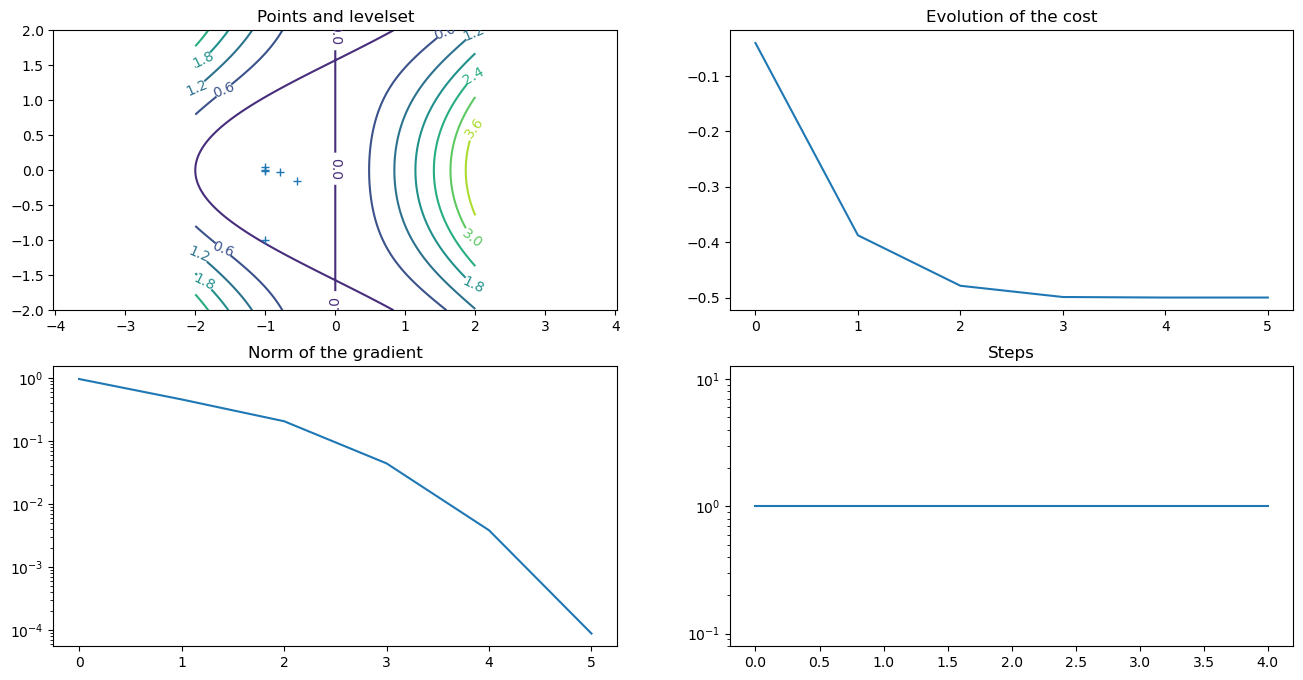

Fonction (x,y) --> 100*(y-x^2)^2 +(1-x)^2
iter :  52 cost :2.871e-13 grad :2.117e-05 comp=[  80, 107,   0]


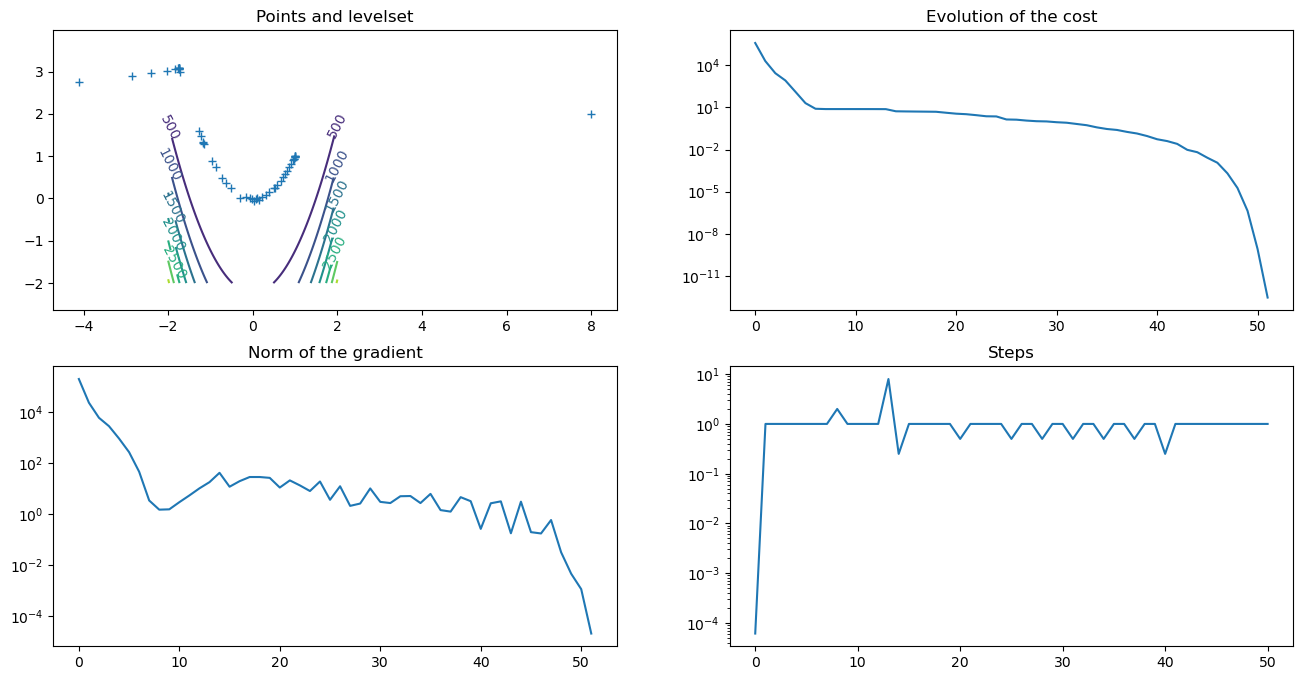

In [23]:
f=func.oscill()
x0=np.array([-1,-1])
B=BFGS()
res=opt.main_algorithm(f,0.1,x0,ls=ls_wolfe_step_is_one,dc=B.dc,verbose=True)
opt.graphical_info(res,f)


f=func.Rosen()
x0=np.array([8,2])
B=BFGS()
res=opt.main_algorithm(f,1,x0,ls=ls_wolfe_step_is_one,dc=B.dc,verbose=False)
print("iter : {:3d} cost :{:1.3e} grad :{:1.3e} comp=[{:4d},{:4d},{:4d}]"
      .format(len(res['list_costs']),res['list_costs'][-1],res['list_grads'][-1],f.nb_eval,f.nb_grad,f.nb_hess))
opt.graphical_info(res,f)

Fonction (x,y) --> 100*(y-x^2)^2 +(1-x)^2
iter :  25 cost :4.379e-11 grad :7.989e-05 comp=[  38,  51,   0]


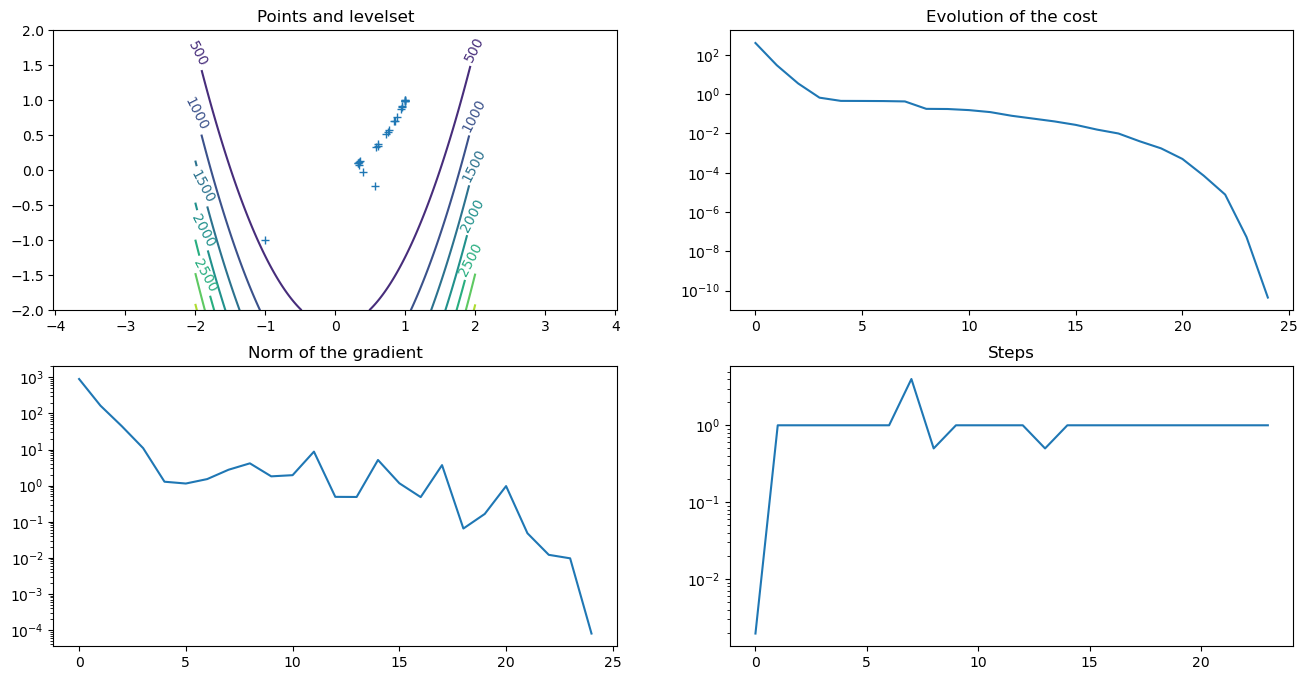

In [24]:
f=func.Rosen()
x0=np.array([-1,-1])
B=BFGS()
res=opt.main_algorithm(f,1,x0,ls=ls_wolfe_step_is_one,dc=B.dc,verbose=False)
print("iter : {:3d} cost :{:1.3e} grad :{:1.3e} comp=[{:4d},{:4d},{:4d}]"
      .format(len(res['list_costs']),res['list_costs'][-1],res['list_grads'][-1],f.nb_eval,f.nb_grad,f.nb_hess))
opt.graphical_info(res,f)

## Comparaison
Votre objectif est de regarder la documentation de `scipy.optimize`, de comprendre le code suivant et de comparer votre algorithme de BFGS+Wolfe avec les algorithmes disponibles dans scipy.optimize

In [25]:
f=func.Rosen()
x0=np.array([-1,-1])
from scipy.optimize import minimize
res=minimize(f.value,x0,jac=f.grad)


Fonction (x,y) --> 100*(y-x^2)^2 +(1-x)^2


In [26]:
print(res)
print(f.nb_eval,f.nb_grad)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.8499214547674284e-16
        x: [ 1.000e+00  1.000e+00]
      nit: 31
      jac: [ 2.763e-07 -1.261e-07]
 hess_inv: [[ 5.083e-01  1.016e+00]
            [ 1.016e+00  2.036e+00]]
     nfev: 40
     njev: 40
40 40
